<a href="https://colab.research.google.com/github/IsaacHa999/Data_analysis_Seoul/blob/main/4%EC%A3%BC_6%EA%B0%95_Typing_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98_%EC%99%9C%EA%B3%A1%EC%9D%B4_%EC%98%88%EC%B8%A1%EC%97%90_%EB%AF%B8%EC%B9%98%EB%8A%94_%EC%98%81%ED%96%A5_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%ED%98%B8_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 왜곡이 예측에 미치는 영향_ 타이타닉호 생존여부 머신러닝(SVM)으로 예측하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. 사용 패키지와 모듈 임포트

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split #학습데이터와 테스트데이터 분할
from sklearn import svm   #SVM 모델
from sklearn import metrics  #정확도 비교

import seaborn as sns

pd.set_option('mode.chained_assignment',  None) # Warning 방지용

### 2. 학습, 테스트 데이터 각각 가져오기
#### 데이터는 여성의 비율을 6%, 남성의 비율을 94%로 조정한 데이터 - 여성은 모든 등급좌석에서 생존율이 남성보다 높고, 1,2 등급은 월등히 높았음

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/데이터편향/titanic_train_male_large.csv')   #남성 비율이 94%인 경우
#train_df = pd.read_csv('./titanic_train_female_large.csv') #남성 비율이 14%, 여성 비율이 86%인 경우
train_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,3,"Lundstrom, Mr. Thure Edvin",1,32.0,0,0,350403,7.5792,NaN,S,1
1,3,"Dean, Master. Bertram Vere",1,1.0,1,2,C.A. 2315,20.5750,NaN,S,1
2,3,"Jansson, Mr. Carl Olof",1,21.0,0,0,350034,7.7958,NaN,S,1
3,3,"Johnson, Master. Harold Theodor",1,4.0,1,1,347742,11.1333,NaN,S,1
4,2,"Wells, Master. Ralph Lester",1,2.0,1,1,29103,23.0000,NaN,S,1


In [5]:
test_df = pd.read_csv('/content/drive/MyDrive/데이터편향/test.csv')
test_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",0,22.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
1,3,"Buckley, Mr. Daniel",1,21.0,0,0,330920,7.8208,NaN,Q,1
2,2,"Ware, Mrs. John James (Florence Louise Long)",0,31.0,0,0,CA 31352,21.0000,NaN,S,1
3,3,"Connaghton, Mr. Michael",1,31.0,0,0,335097,7.7500,NaN,Q,0
4,2,"Laroche, Mr. Joseph Philippe Lemercier",1,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,0


In [ ]:
#pclass : Passenger Class, 승객등급
#name : 승객이름
#sex : 승객성별 (여성은 0, 남성은 1)
#age : 승객나이
#sibsp : 동승한 형제 또는 배우자 수
#parch : 동승한 부모 또는 자녀 수
#ticket : 티켓번호
#fare : 승객 지불 요금
#cabin : 선실이름
#embarked : 승선항(C=쉘 브르크, Q=퀸즈타운, S=사우스 햄튼)
#survived : 생존 여부(생존은 1, 아닌경우는 0)

In [6]:
#데이터의 행,열 개수 확인
print(train_df.shape)
print(test_df.shape)

(543, 11)
(210, 11)


In [7]:
#나이 데이터를 범주화 하기 위해서 10으로 나눈 몫에서 10을 곱해줌 
train_df['age'] = (train_df['age']//10) * 10  
train_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,3,"Lundstrom, Mr. Thure Edvin",1,30.0,0,0,350403,7.5792,NaN,S,1
1,3,"Dean, Master. Bertram Vere",1,0.0,1,2,C.A. 2315,20.5750,NaN,S,1
2,3,"Jansson, Mr. Carl Olof",1,20.0,0,0,350034,7.7958,NaN,S,1
3,3,"Johnson, Master. Harold Theodor",1,0.0,1,1,347742,11.1333,NaN,S,1
4,2,"Wells, Master. Ralph Lester",1,0.0,1,1,29103,23.0000,NaN,S,1


In [8]:
train_df.corr()

,pclass,sex,age,sibsp,parch,fare,survived
pclass,1.000000,0.050424,-0.416254,0.004714,0.018068,-0.591941,-0.221157
sex,0.050424,1.000000,-0.038841,-0.076742,-0.172530,-0.116316,-0.269154
age,-0.416254,-0.038841,1.000000,-0.225724,-0.094489,0.202069,-0.050858
sibsp,0.004714,-0.076742,-0.225724,1.000000,0.376308,0.267971,0.006694
parch,0.018068,-0.172530,-0.094489,0.376308,1.000000,0.300595,0.079731
fare,-0.591941,-0.116316,0.202069,0.267971,0.300595,1.000000,0.156329
survived,-0.221157,-0.269154,-0.050858,0.006694,0.079731,0.156329,1.000000


In [9]:
#나이 데이터를 범주화 하기 위해서 10으로 나눈 몫에서 10을 곱해줌 
test_df['age'] = (test_df['age']//10) * 10  
test_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",0,20.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
1,3,"Buckley, Mr. Daniel",1,20.0,0,0,330920,7.8208,NaN,Q,1
2,2,"Ware, Mrs. John James (Florence Louise Long)",0,30.0,0,0,CA 31352,21.0000,NaN,S,1
3,3,"Connaghton, Mr. Michael",1,30.0,0,0,335097,7.7500,NaN,Q,0
4,2,"Laroche, Mr. Joseph Philippe Lemercier",1,20.0,1,2,SC/Paris 2123,41.5792,NaN,C,0


### 데이터 셋을 train_test_split()로 분할할 필요없음, 이미 나누어진 데이터를 각각 가져왔음
### 성별이 결과에 큰영향이 없다고 가정하고 의도적으로 sex 변수를 학습 피쳐로 넣지 않고, pclass와 age 변수만을 선택해서 학습 모델을 만들어 보자.

### 3. 학습용 데이터셋 : 학습데이터와 레이블(정답) 나누기

In [10]:
train_data_df = train_df[['pclass','age']]
train_data_df.head()

,pclass,age
0,3,30.0
1,3,0.0
2,3,20.0
3,3,0.0
4,2,0.0


In [11]:
train_label_df = train_df[['survived']]
train_label_df.head()

,survived
0,1
1,1
2,1
3,1
4,1


In [12]:
train_data = train_data_df.values           # 값부분만 가져오기(2차원 형태)
train_data

array([[ 3., 30.],
       [ 3.,  0.],
       [ 3., 20.],
       ...,
       [ 3.,  0.],
       [ 3., 10.],
       [ 3.,  0.]])

In [13]:
train_label = train_label_df.values.ravel() # 값부분을 1차원으로 펴주기
train_label

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

### 4. 테스트 데이터셋 : 학습데이터와 레이블(정답) 나누기

In [14]:
test_data_df = test_df[['pclass','age']]
test_data_df.head()

,pclass,age
0,2,20.0
1,3,20.0
2,2,30.0
3,3,30.0
4,2,20.0


In [15]:
test_label_df = test_df[['survived']]  
test_label_df.head()

,survived
0,1
1,1
2,1
3,0
4,0


In [16]:
test_data = test_data_df.values           # 값부분만 가져오기(2차원 형태)
test_data

array([[ 2., 20.],
       [ 3., 20.],
       [ 2., 30.],
       [ 3., 30.],
       [ 2., 20.],
       [ 3., 20.],
       [ 3., 30.],
       [ 2., 40.],
       [ 3., 10.],
       [ 2., 40.],
       [ 3., 30.],
       [ 2., 30.],
       [ 2., 50.],
       [ 2., 20.],
       [ 3., 10.],
       [ 3., 20.],
       [ 3., 20.],
       [ 2., 20.],
       [ 1., 20.],
       [ 1., 40.],
       [ 3., 60.],
       [ 2., 20.],
       [ 1.,  0.],
       [ 3., 30.],
       [ 1., 30.],
       [ 1., 30.],
       [ 1., 60.],
       [ 3.,  0.],
       [ 3., 20.],
       [ 1., 20.],
       [ 1., 30.],
       [ 1., 40.],
       [ 1., 40.],
       [ 3., 10.],
       [ 1., 40.],
       [ 3., 10.],
       [ 1., 40.],
       [ 2., 20.],
       [ 2., 20.],
       [ 3., 10.],
       [ 3., 10.],
       [ 2., 10.],
       [ 1., 20.],
       [ 2., 20.],
       [ 3.,  0.],
       [ 2., 50.],
       [ 3., 20.],
       [ 3., 30.],
       [ 3., 20.],
       [ 3., 30.],
       [ 1., 10.],
       [ 1., 50.],
       [ 2.,

In [17]:
test_label = test_label_df.values.ravel() # 값부분을 1차원으로 펴주기
test_label

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

### 5. SVM 모델 학습하기

In [18]:
clf = svm.SVC(C = 1, gamma = 0.1)     #svm 객체 생성
clf.fit(train_data, train_label)      #svm 모델로 학습데이터로 학습하기

SVC(C=1, gamma=0.1)

### 6. 테스트 데이터로 예측하기

In [19]:
pred_svm = clf.predict(test_data)
pred_svm  #svm이 예측한 생존 여부 값

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [20]:
#예측 결과를 test데이터에 추가해줌
test_df['survived_predict']=pred_svm
test_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,survived_predict
0,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",0,20.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0
1,3,"Buckley, Mr. Daniel",1,20.0,0,0,330920,7.8208,NaN,Q,1,0
2,2,"Ware, Mrs. John James (Florence Louise Long)",0,30.0,0,0,CA 31352,21.0000,NaN,S,1,0
3,3,"Connaghton, Mr. Michael",1,30.0,0,0,335097,7.7500,NaN,Q,0,0
4,2,"Laroche, Mr. Joseph Philippe Lemercier",1,20.0,1,2,SC/Paris 2123,41.5792,NaN,C,0,0


### 7. 테스트 데이터의 예측 결과 그래프로 나타내보기

3    102
2     56
1     52
Name: pclass, dtype: int64


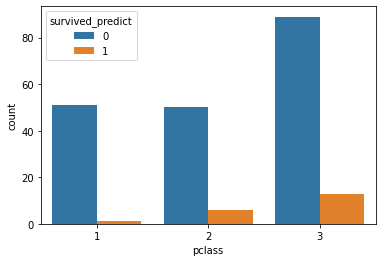

In [21]:
#테스트 데이터의 pclass 피처에서 survived_predict 피처를 기준으로 그룹을 나누어 그룹별 분포를 살펴봄
# 1은 생존자 0은 사망자

print(test_df['pclass'].value_counts()) # plclass내에서 각 그룹별 수를 세어줌
ax = sns.countplot(x='pclass', hue= 'survived_predict', data= test_df)  # pclass의 count의 수를 hue에 설정된 카테고리로 나눠 그려줌

#1등급 클래스에서 생존자가 줄어듦

1    148
0     62
Name: sex, dtype: int64


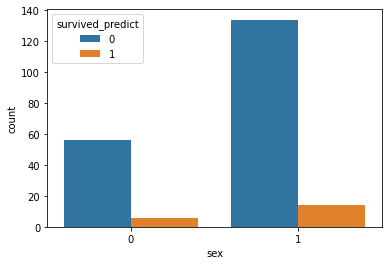

In [22]:
#테스트데이터의 survived_predict 피처를 기준으로 그룹을 나누어 그룹별 sex 피처의 분포를 살펴봄 (0은 여성, 1은 남성)
print(test_df['sex'].value_counts())
ax = sns.countplot(x='sex', hue= 'survived_predict', data= test_df)

#여성의 사망자와 남성의 생존자가 증가

In [23]:
test_df.groupby(['pclass','sex']).mean()
#1등급 탑승객은 평균연령이 가장 높음, 1등급 클래스 여성이 가장 생존율이 높음, 2,3등급 클래스 남성이 가장 생존율이 낮음

age     sibsp     parch        fare  survived  \
pclass sex                                                        
1      0    30.000000  0.750000  0.500000  114.252300  1.000000   
       1    36.250000  0.281250  0.343750   89.616800  0.187500   
2      0    26.842105  0.473684  1.000000   25.384211  0.947368   
       1    24.864865  0.513514  0.351351   21.826127  0.243243   
3      0    14.782609  0.826087  0.869565   15.277000  0.521739   
       1    21.645570  0.708861  0.278481   12.980115  0.139241   

            survived_predict  
pclass sex                    
1      0            0.000000  
       1            0.031250  
2      0            0.052632  
       1            0.135135  
3      0            0.217391  
       1            0.101266